In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score,f1_score,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
rice=pd.read_csv('Rice_Cammeo_Osmancik.csv')

In [4]:
rice

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


In [7]:
rice.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64

In [8]:
rice.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


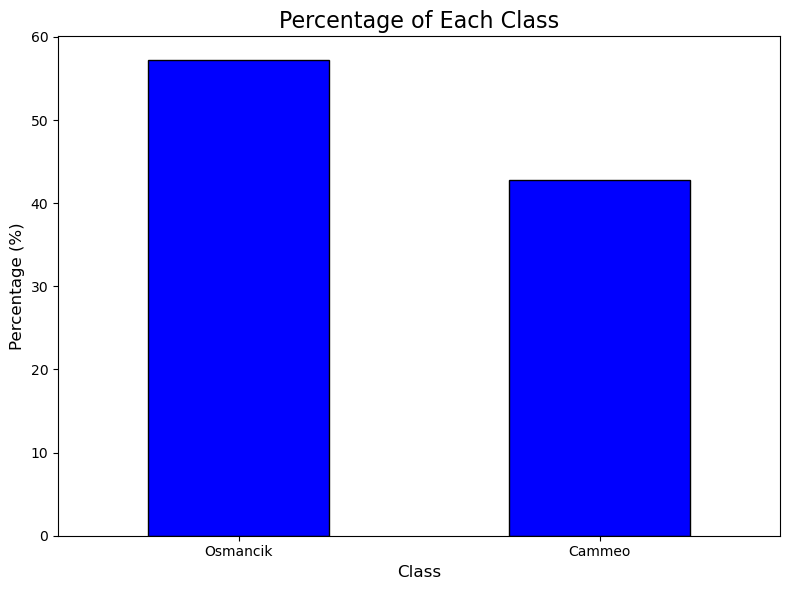

In [18]:
class_counts = rice['Class'].value_counts(normalize=True) * 100

# Plot the bar chart
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Percentage of Each Class', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0, fontsize = 10)
plt.tight_layout()
plt.show()

<Axes: >

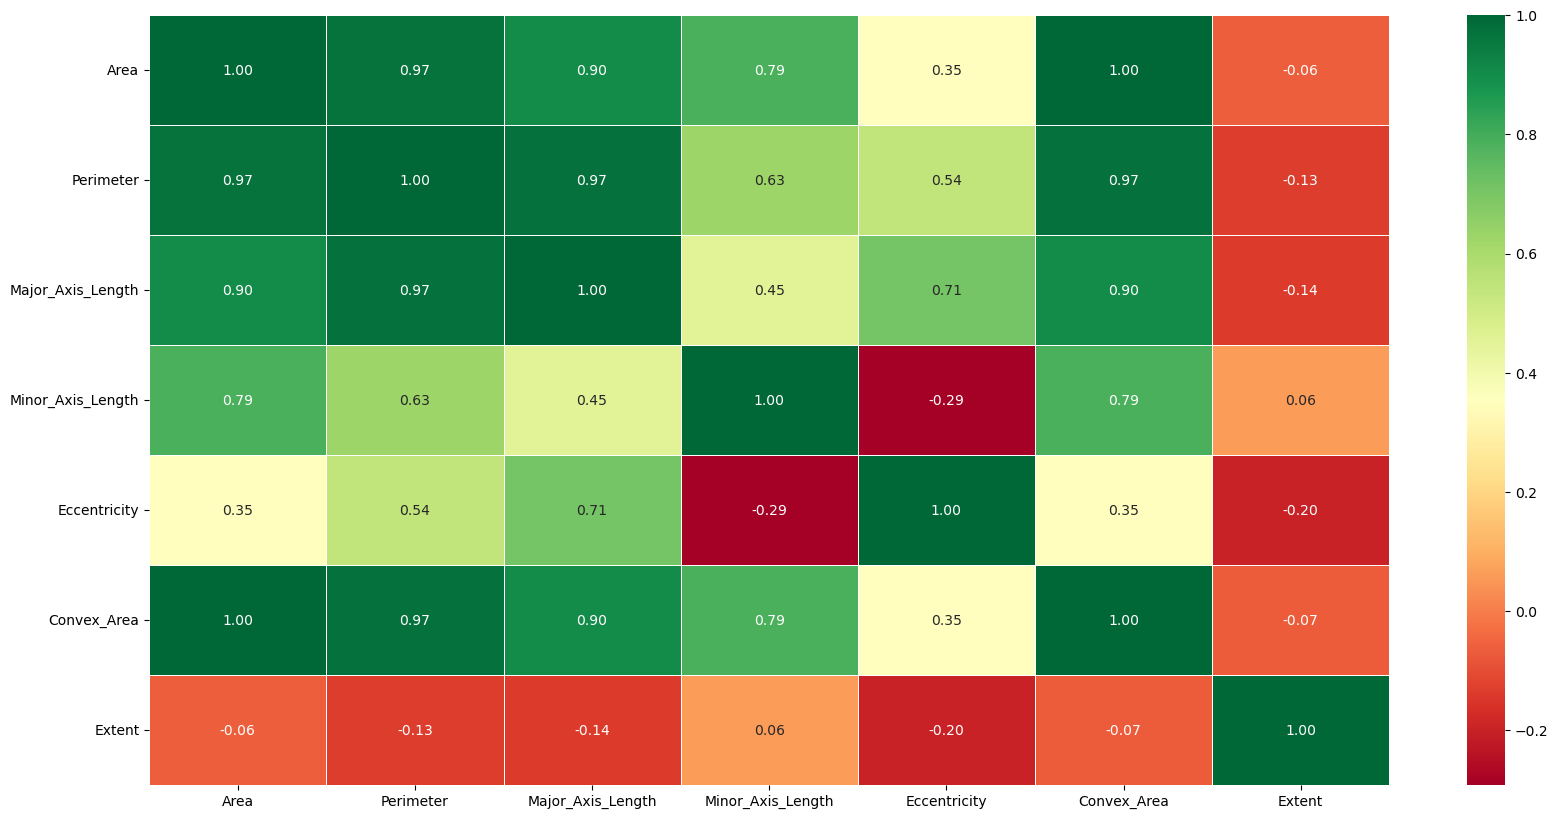

In [22]:
rice_no_class = rice.drop(['Class'],axis=1)
corrmat = rice_no_class.corr()
plt.figure(figsize=(20,10))
sns.heatmap(rice_no_class[corrmat.index].corr(), annot=True,linewidth=0.5,fmt='.2f',cmap="RdYlGn")

In [25]:
from scipy.stats import ttest_ind

Osmancik = rice[rice['Class']=='Osmancik']
Cammeo = rice[rice['Class']=='Cammeo']

p_val = ttest_ind(Osmancik['Area'],Cammeo['Area']).pvalue
print(p_val)

#95% Confidence Interval
if p_val < 0.05:
    print("We are Rejecting Null Hypothesis")
else:
    print("We are Rejecting Null Hypothesis")

0.0
We are Rejecting Null Hypothesis


In [32]:
p_val = ttest_ind(Osmancik['Extent'],Cammeo['Extent']).pvalue
print(p_val)

#95% Confidence Interval
if p_val < 0.05:
    print("We are Rejecting Null Hypothesis")
else:
    print("We are Rejecting Null Hypothesis")

3.10661913291227e-13
We are Rejecting Null Hypothesis


In [ ]:
p_val = ttest_ind(Osmancik['Perimeter'],Cammeo['Perimeter']).pvalue
print(p_val)

#95% Confidence Interval
if p_val < 0.05:
    print("We are Rejecting Null Hypothesis")
else:
    print("We are Rejecting Null Hypothesis")

0.0
We are Rejecting Null Hypothesis


In [34]:
p_val = ttest_ind(Osmancik['Minor_Axis_Length'],Cammeo['Minor_Axis_Length']).pvalue
print(p_val)

#95% Confidence Interval
if p_val < 0.05:
    print("We are Rejecting Null Hypothesis")
else:
    print("We are Rejecting Null Hypothesis")

3.5568855098550715e-124
We are Rejecting Null Hypothesis


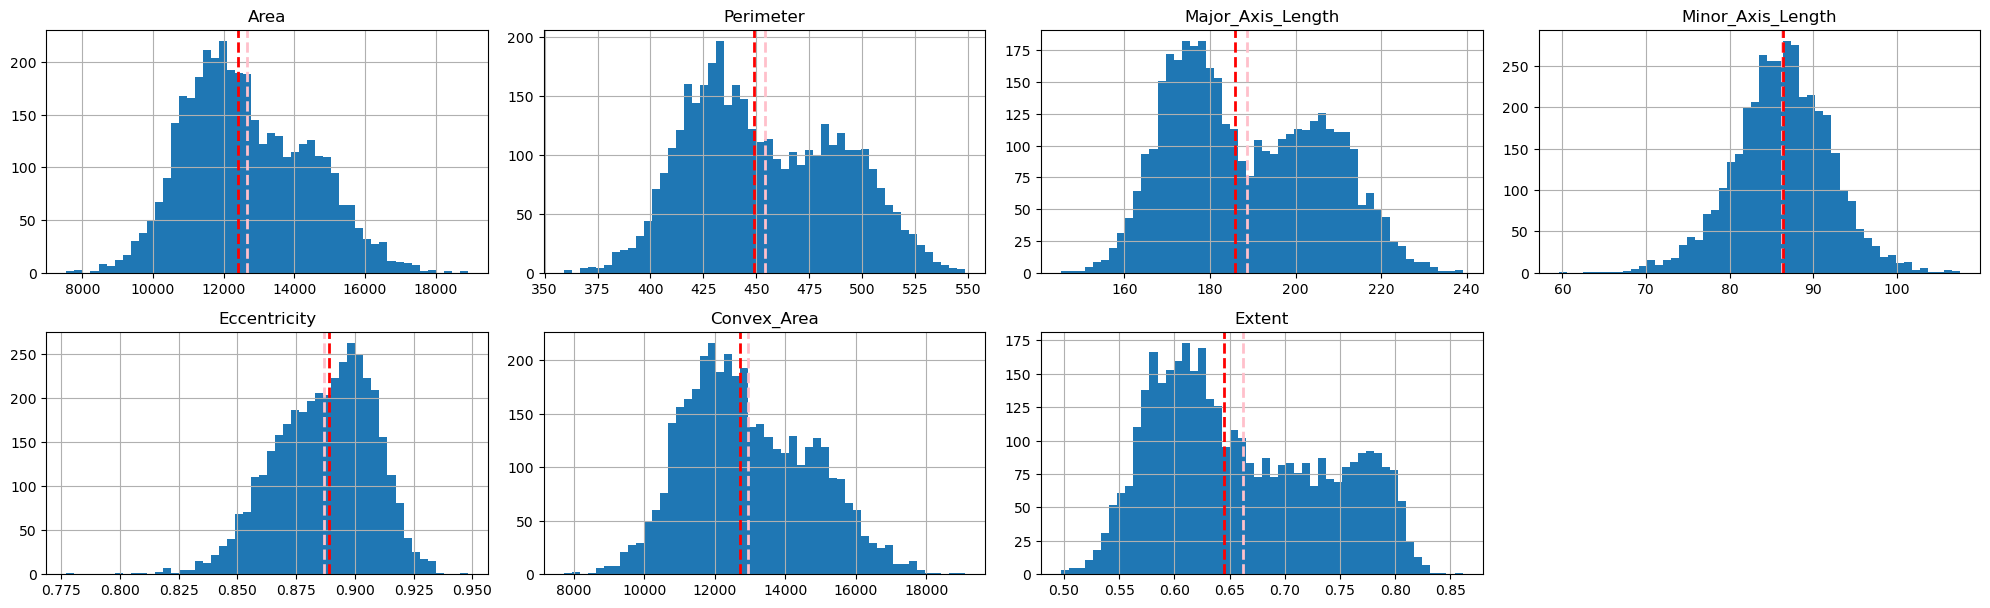

In [37]:
#Checking for distribution of data using histogram
numeric_col = ['Area','Perimeter','Major_Axis_Length','Minor_Axis_Length','Eccentricity','Convex_Area','Extent']
rows=5
cols=4 
counter=1 
fig = plt.figure(figsize=(20,15)) 
for col in numeric_col: 
    plt.subplot(rows, cols, counter) 
    ax = fig.gca() 
    rice[col].hist(bins=50, ax = ax) 
    ax.axvline(rice[col].mean(), color = 'pink', linestyle='dashed', linewidth=2) 
    ax.axvline(rice[col].median(), color = 'red', linestyle='dashed', linewidth=2) 
    ax.set_title(col) 
    counter=counter+1 
    plt.tight_layout()


In [38]:
scaler = MinMaxScaler()
rice[numeric_col] = scaler.fit_transform(rice[numeric_col])

In [39]:
rice.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,0.450337,0.502462,0.464145,0.557828,0.642005,0.459696,0.452433
std,0.152470,0.188000,0.186127,0.119346,0.121901,0.156204,0.212406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.336164,0.354086,0.310300,0.483217,0.557279,0.343113,0.278986
50%,0.428666,0.474013,0.432505,0.560346,0.654768,0.438071,0.406858
75%,0.563193,0.657969,0.621743,0.637601,0.734041,0.576741,0.630158
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Split your data to train and test.Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split(rice_no_class,rice['Class'], test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3048, 7)
(762, 7)
(3048,)
(762,)


In [42]:
train_scaler=StandardScaler()
test_scaler=StandardScaler() 

#Fit on data 
x_scaled=train_scaler.fit_transform(rice_no_class)
x_train_scaled=train_scaler.fit_transform(x_train)
x_test_scaled=test_scaler.fit_transform(x_test) 

#converting scaled data into dataframe
x_scaled_df=pd.DataFrame(data=x_scaled, columns=rice_no_class.columns,index=rice_no_class.index)
x_scaled_train_df=pd.DataFrame(data=x_train_scaled, columns=x_train.columns, index=x_train.index)
x_scaled_test_df=pd.DataFrame (data=x_test_scaled, columns=x_test.columns, index=x_test.index)

In [43]:
x_scaled_df.head(3)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,1.479830,2.004354,2.348547,-0.212943,2.018337,1.499659,-1.152921
1,1.147870,1.125853,0.988390,0.945568,0.410018,1.192918,-0.602079
2,1.135169,1.317214,1.451908,0.253887,1.212956,1.126504,0.405611


In [ ]:
models=[LogisticRegression (max_iter=1000), SVC(kernel='linear'),KNeighborsClassifier(),
        RandomForestClassifier(random_state=8, criterion='entropy', n_estimators=4)]

def compare_models_cross_validation(): 
    model_scores={} 
    for model in models: 
        cv_score = cross_val_score (model, x_train_scaled, y_train, cv=5)

        mean_accuracy= sum(cv_score)/len(cv_score)
        mean_accuracy=mean_accuracy*100 
        mean_accuracy = round(mean_accuracy, 2) 
        print('Cross Validation accuracies for the', model, '=', cv_score) 
        print('Acccuracy score of the, model', '=', mean_accuracy, '%')

In [62]:
compare_models_cross_validation()

Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.9147541  0.93278689 0.93442623 0.92775041 0.92118227]
Acccuracy score of the, model = 92.62 %
Cross Validation accuracies for the SVC(kernel='linear') = [0.91311475 0.93442623 0.93770492 0.92118227 0.92775041]
Acccuracy score of the, model = 92.68 %
Cross Validation accuracies for the KNeighborsClassifier() = [0.89836066 0.9295082  0.92622951 0.92118227 0.91954023]
Acccuracy score of the, model = 91.9 %
Cross Validation accuracies for the RandomForestClassifier(criterion='entropy', n_estimators=4, random_state=8) = [0.89016393 0.90983607 0.90655738 0.89162562 0.90311987]
Acccuracy score of the, model = 90.03 %


In [67]:
models={ 
    'Logistic Regression': LogisticRegression(), 
    'KNN':KNeighborsClassifier(), 
    'Support Vector':SVC(), 
    'Random Forest': RandomForestClassifier(criterion="entropy", n_estimators=4, random_state=0)
}

In [69]:
#Create function to fit and score models 
def fit_and_score (models, x_train, x_test,y_train,y_test): 
    
    # Dictionary to keep model scores 
    models_trained={} 
    model_scores={} 
    class_report={} 
    
    #Loop through models 
    for name, model in models.items(): 
        #Fit the model to the data 
        model=model.fit(x_train,y_train) 
        models_trained[name]=model 
        
        #Evaluate the model and append its accuracy score to model_scores 
        model_scores[name]=model.score(x_test,y_test) 
        
        #Predicting with tuned model 
        y_preds=model.predict(x_test) 
        
        #Creating classification report and storing it in dictionary 
        class_report[name]=classification_report(y_test,y_preds) 
        
    #Saving all model accuracy scores in dataframe 
    model_compare=pd.DataFrame (model_scores, index=['accuracy']) 

    return model_scores, model_compare, class_report, models_trained

In [70]:
# Model implementation using function 
model_scores=fit_and_score(models=models,x_train=x_scaled_train_df,x_test=x_scaled_test_df,y_train=y_train,y_test=y_test)

In [73]:
#Printing accuracy score of all the models 
pd.DataFrame([model_scores[0]]).rename(index={0: 'Score'})

,Logistic Regression,KNN,Support Vector,Random Forest
Score,0.931759,0.925197,0.937008,0.91601


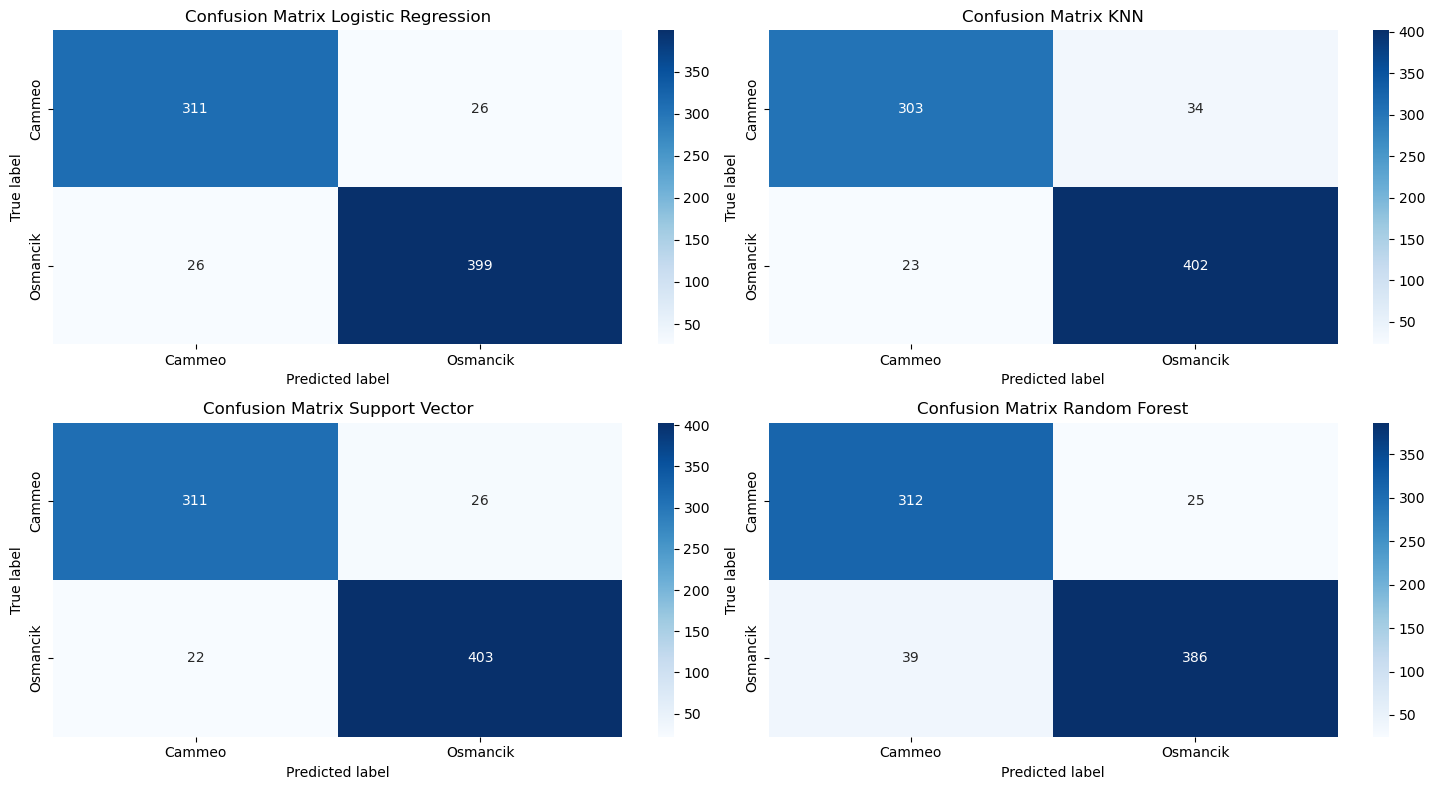

In [93]:
#Confusion matrix for all the implemented models 
rows=2
cols=2 
counter=1 
fig = plt.figure(figsize=(15,8)) 
for ind, key in enumerate (model_scores[3].keys()): 
    y_score=model_scores[3][key].predict(x_scaled_test_df) 
    ConfMatrix=confusion_matrix(y_test,y_score) 
    plt.subplot(rows, cols, counter) 
    sns.heatmap(ConfMatrix, annot=True, cmap="Blues", fmt="d", xticklabels = ['Cammeo','Osmancik'], 
    yticklabels = ['Cammeo','Osmancik'])
    plt.ylabel("True label") 
    plt.xlabel("Predicted label") 
    plt.title(f"Confusion Matrix {key}") 
    counter=counter+1 
    plt.tight_layout()

In [99]:
#Printing classification report of all implemented models 
for key in model_scores[2].keys(): 
    print(f'{key}:\n\n{model_scores[2][key]}')

Logistic Regression:

              precision    recall  f1-score   support

      Cammeo       0.92      0.92      0.92       337
    Osmancik       0.94      0.94      0.94       425

    accuracy                           0.93       762
   macro avg       0.93      0.93      0.93       762
weighted avg       0.93      0.93      0.93       762

KNN:

              precision    recall  f1-score   support

      Cammeo       0.93      0.90      0.91       337
    Osmancik       0.92      0.95      0.93       425

    accuracy                           0.93       762
   macro avg       0.93      0.92      0.92       762
weighted avg       0.93      0.93      0.93       762

Support Vector:

              precision    recall  f1-score   support

      Cammeo       0.93      0.92      0.93       337
    Osmancik       0.94      0.95      0.94       425

    accuracy                           0.94       762
   macro avg       0.94      0.94      0.94       762
weighted avg       0.94      